In [17]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

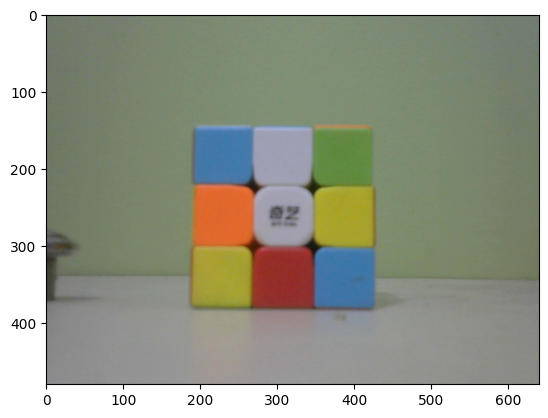

In [13]:
video = cv2.VideoCapture(0)

lowerThreshold = 12
upperThreshold = 28

minArea = 3700
maxArea = 9300

check, frame = video.read()

rg = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

minX = 10000
maxX = 0
minY = 10000
maxY = 0

plt.imshow(rg)

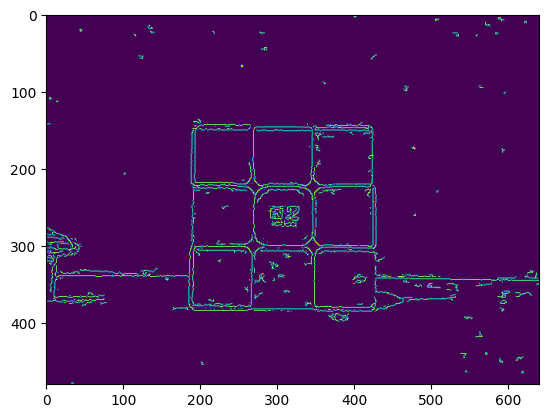

In [14]:
image = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
image = cv2.Canny(image, lowerThreshold, upperThreshold)

plt.imshow(image)

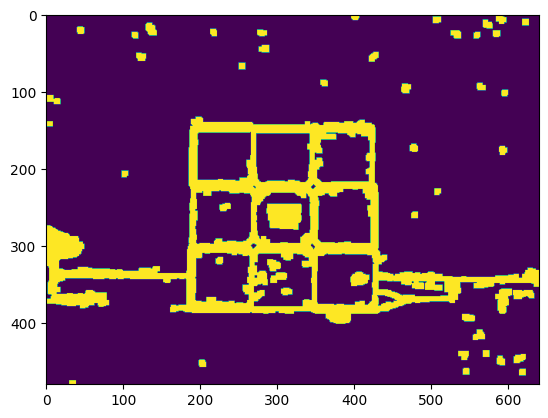

In [15]:
SE = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
image = cv2.dilate(image, SE, iterations=3)

plt.imshow(image)

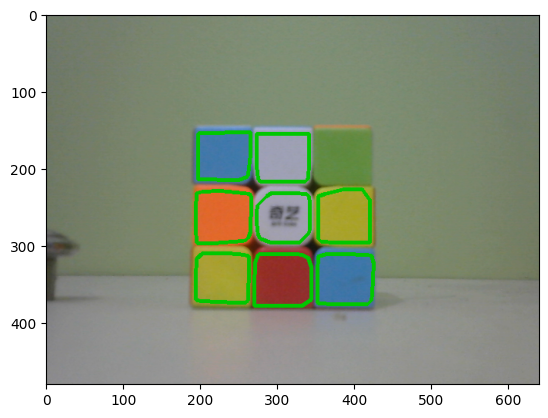

In [16]:
image = cv2.bitwise_not(image)
cnts = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area > minArea and area < maxArea:
            # cv2.drawContours(frame, [c], -1, (0,255,0), 3)
            
        x,y,w,h = cv2.boundingRect(c)
            # cv2.rectangle(frame, (x, y), (x + w, y + h), (36,255,12), 2)

        if x<minX:
            minX = x
        if x+w>maxX:
            maxX = x + w
        if y<minY:
            minY = y
        if y+h>maxY:
            maxY = y + h

        hull = cv2.convexHull(c)
        cv2.drawContours(rg, [hull], -1, (0,200,0), 3)

plt.imshow(rg)

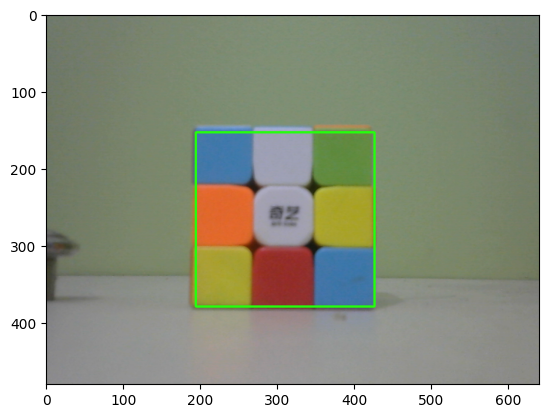

In [35]:
rg = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
cv2.rectangle(rg, (minX, minY), (maxX, maxY), (36,255,12), 2) 
plt.imshow(rg)

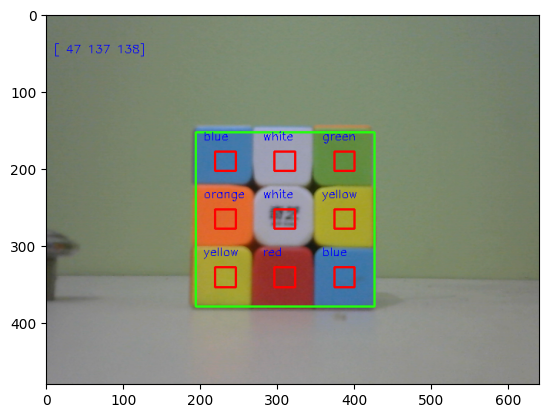

In [36]:
rgb = rg
bg = frame

def findKColor(color):
    if color == 'red':
        return 'D'
    elif color == 'orange':
        return 'U'
    elif color == 'yellow':
        return 'B'
    elif color == 'green':
        return 'L'
    elif color == 'blue':
        return 'R'
    else:
        return 'F'

def findColor(clr):
    if (170 < clr[0] < 180 or 0 <= clr[0] <= 4)and 100 < clr[1] < 255 and 0 < clr[2] < 255:
        return 'red'
    elif 5 <= clr[0] <= 13 and 100 < clr[1] < 255 and 0 < clr[2] < 255:
        return 'orange'
    elif 14 <= clr[0] <= 30 and 100 < clr[1] < 255 and 0 < clr[2] < 255:
        return 'yellow'
    elif 30 <= clr[0] <= 48 and 100 < clr[1] < 255 and 0 < clr[2] < 255:
        return 'green'
    elif 100 <= clr[0] <= 130 and 50 < clr[1] < 170 and 0 < clr[2] < 255:
        return 'blue'
    else:
        return 'white'

def bgr2hsv(h):
    return cv2.cvtColor(np.uint8([[[h[0], h[1], h[2]]]]), cv2.COLOR_BGR2HSV)[0][0]

org = frame

cubeSide=''
cubeFull=''

for i in range(3):
        for j in range(3):
            MINX=int(minX+(maxX-minX)*j/3)
            MINY=int(minY+(maxY-minY)*i/3)
            MAXX=int(minX+(maxX-minX)*(j+1)/3)
            MAXY=int(minY+(maxY-minY)*(i+1)/3)
            BALX=int((MAXX-MINX)/3)
            BALY=int((MAXY-MINY)/3)
            cv2.rectangle(rg, (MINX+BALX, MINY+BALY), (MAXX-BALX, MAXY-BALY), (255,0,0), 2)
            mean = cv2.mean(frame[MINY+BALY:MAXY-BALY,MINX+BALX:MAXX-BALX])
            if i == 0 and j == 2:
                cv2.putText(rg, str(bgr2hsv(mean)), (10,50), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0,0,255), 0, 2)
            cv2.putText(rg, findColor(bgr2hsv(mean)), (int(MINX+10), int(MINY+10)), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0,0,255), 0, 2)
            cubeSide = cubeSide + findKColor(findColor(bgr2hsv(mean)))

plt.imshow(rg)